### Visualize Conv Filters with Simple Models 

Code in tnis notebook shows how to visualize TF/Keras ConvNet filters. 

The code is located at 

```
/drv3/hm3/code/python/tf2.18/tf2.18/local/visualizations/Visualize_CNNFilterActivations_SimpleModels.ipynb

```

The visualizations are stored at the directory 

```
/drv3/hm3/code/python/tf2.18/tf2.18/local/visualizations/VisualizeConvFilters/
```





In [1]:
# get the libraries ready
import os
import shutil, pathlib


from PIL import Image 

import icecream as cc 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

from keras.utils import load_img, img_to_array
from keras.utils import array_to_img
from keras.utils import image_dataset_from_directory
from keras import layers



2025-02-19 17:01:48.819952: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740002508.831741   26693 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740002508.835277   26693 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-19 17:01:48.849463: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# define codeDir for getting code and saving images
codeDir = "/drv3/hm3/code/python/tf2.18/tf2.18/local/visualizations/"
imgVisualizationsDir = codeDir + "VisualizeConvFilters_SmallModels/"

In [3]:

modelDir = "/drv3/hm3/code/python/tf2.18/tf2.18/local/Playground/CNN_DataAugmentation_CatsDogs_KaggleFullSet_AfterCleaning.keras"
model = keras.models.load_model( modelDir  )


#model = keras.models.load_model(
#    "/drv3/hm3/code/python/tf2.18/tf2.18/local/Playground/VGG16.keras")



I0000 00:00:1740002518.564128   26693 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9668 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:08:00.0, compute capability: 8.6


In [4]:
## display model.summary() only if necessary
## To copy/paste as plainm text change presentation mode 
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,982,084 (7.56 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 991,043 (3.78 MB)

In [5]:
# print the names of all the layers type Conv2D and  SeparableConvolution2D that are present in the model 

for layer in model.layers :
#    if isinstance (layer, (keras.layers.Conv2D, keras.layers.SeparableConvolution2D)) :
     if isinstance (layer, (keras.layers.Conv2D)) :

        print( layer.name)

conv2d
conv2d_1
conv2d_2
conv2d_3
conv2d_4


## The Conv2 Layers in this model are:

```
conv2d
conv2d_1
conv2d_2
conv2d_3
conv2d_4
```


In [116]:
# I retrieved a cat image from the location below: 
# img_path = keras.utils.get_file( fname="cat.jpg", origin = "https://img-datasets.s3.amazonaws.com/cat.jpg")
# which I stored at the path below:


img_size = (180, 180)

#img_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/cat_img_from_amazon_s3.jpg"
#imgName = "CatS3"

#img_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/cat.444.jpg"
#imgName = "Cat444"

#img_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/dog.582.jpg"
#imgName = "Dog582"

img_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/baby_794.jpg"
imgName = "Baby794"


# after seeing the impressive results, I decided to run another experiment with a different image
# which I think I got when I wast working with PCS/SVD for immage reconstruction
# img_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/cat.444.jpg"

# results were equally impressive. So I tried to use the image of a dog,
# img_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/dog.582.jpg"

# again, impressive results. I guess the NN is "well" trained to recognize eyes and nose in imgs.
# Then I tried with the face of a baby:
# img_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/baby_794.jpg"

In [119]:
# get sample img as a tensor
def get_img_array( img_path, target_size) :
    img = keras.utils.load_img( img_path, target_size=target_size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

img_tensor = get_img_array(img_path, target_size= img_size)

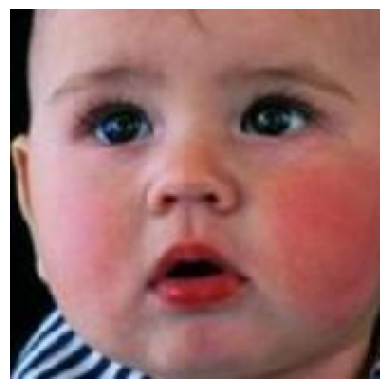

In [120]:
plt.axis("off")
plt.imshow(img_tensor[0].astype("uint8"))

In [158]:
# select the filters in the layers named below 

# layer_name = "conv2d"
# layer_name = "conv2d_1"
# layer_name = "conv2d_2"
# layer_name = "conv2d_3"
layer_name = "conv2d_4" 

layer = model.get_layer(name = layer_name)
feature_extractor = keras.Model( inputs = model.input, outputs=layer.output)



In [54]:


def calculate_mean(image_dir):
    """Calculates the mean pixel values from a directory of images."""
    image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    means = np.zeros(3)  # Assuming RGB images
    count = 0

    for file in image_files:
        img = np.array(Image.open(file), dtype=np.float32)
        means += np.mean(img, axis=(0, 1))
        count += 1

    return means / count


cat_train_dir = "/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/train/cat"
mean_cat_train = calculate_mean( cat_train_dir )

print (mean_cat_train )

dog_train_dir = "/drv3/hm3/Data/ImgData/CatsDogs_Kaggle/FullSet/test/cat"
mean_dog_train = calculate_mean( dog_train_dir )

mean_ave_cats_dogs = (mean_cat_train + mean_dog_train) / 2.0 



[123.44020203 114.32189547 106.213005  ]


In [159]:
def custom_preprocess(image, mean_values):
    """
    Custom preprocessing with mean subtraction and scaling.
    """
    image = np.array(image, dtype=np.float32)
    image -= mean_values # mean_values is a numpy array containing the mean values of each channel.
    image /= 255.0
    return image

In [160]:
activation = feature_extractor( keras.applications.xception.preprocess_input(img_tensor))
# activation = feature_extractor( custom_preprocess(img_tensor, mean_ave_cats_dogs))

In [161]:
def compute_loss ( image, filter_index) :
    activation = feature_extractor(image)
    filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    return tf.reduce_mean(filter_activation)


In [162]:
# loss maximization via stocastic gradient ascent
@tf.function
def gradient_ascent_step( image, filter_index, learning_rate) :
    with tf.GradientTape() as tape :
        tape.watch(image)
        loss = compute_loss(image, filter_index)
        grads = tape.gradient(loss, image)
        grads = tf.math.l2_normalize( grads) 
        image += learning_rate * grads
        return image
    

In [135]:
# Function to generate Filter activations
img_width = 180
img_height = 180

def generate_filter_pattern( filter_index ) :
    iterations = 30
    learning_rate = 10.
    image = tf.random.uniform( minval=0.4, maxval=0.6, shape=(1, img_width, img_height, 3))
    for i in range ( iterations) :
        image = gradient_ascent_step( image, filter_index, learning_rate)
    return image[0].numpy()

    

In [163]:
# Utility function to convert a tensor into a valid img
def deprocess_image(image) :
    image -= image.mean()
    image /= image.std()
    image *= 64
    image += 128
    image = np.clip( image, 0, 255).astype("uint8")
    image = image[25:-25, 25:-25, :]
    return image



Layer name = conv2d_4


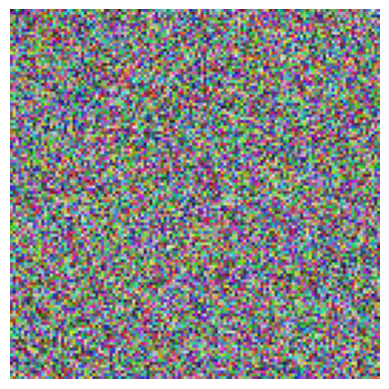

In [164]:
print("Layer name =", layer_name)
plt.axis("off")
plt.imshow(deprocess_image(generate_filter_pattern(filter_index=1)))            



Layer name = conv2d_4


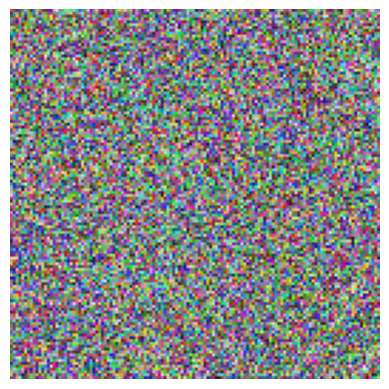

In [165]:
print("Layer name =", layer_name)
plt.axis("off")
plt.imshow(deprocess_image(generate_filter_pattern(filter_index=8)))     
 

In [166]:
# Generate a grid of all filter responses in layer selected as "layer_name} in cell 5 of this notebook "

nFilters = 64
all_images = []
for filter_index in range ( nFilters ) :
    print(f"Processing filter {filter_index}")
    image = deprocess_image ( generate_filter_pattern(filter_index))
    all_images.append(image)

margin = 5
n = 8


if nFilters == 32:
    n = 4

cropped_width = img_width - 25 * 2
cropped_height = img_height - 25 * 2
width = n * cropped_width + ( n-1 ) * margin
heigth = n * cropped_height + ( n-1 ) * margin
stitched_filters = np.zeros (( width, heigth, 3))

for i in range(n):
    for j in range(n):
        k = i * n + j
        print(f"Processing image { k }")
        image = all_images[ k ]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :,
        ] = image
     






Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15
Processing filter 16
Processing filter 17
Processing filter 18
Processing filter 19
Processing filter 20
Processing filter 21
Processing filter 22
Processing filter 23
Processing filter 24
Processing filter 25
Processing filter 26
Processing filter 27
Processing filter 28
Processing filter 29
Processing filter 30
Processing filter 31
Processing filter 32
Processing filter 33
Processing filter 34
Processing filter 35
Processing filter 36
Processing filter 37
Processing filter 38
Processing filter 39
Processing filter 40
Processing filter 41
Processing filter 42
Processing filter 43
Processing filter 44
Processing filter 45
Processing filter 46
Processing filter 47
Pr

In [167]:
    
imgVisFile = imgVisualizationsDir + layer_name + imgName + "_64.jpg"
keras.utils.save_img( imgVisFile, stitched_filters)   

In [ ]:
## display model.summary() only if necessary
# model.summary()
